# Author :  Sagar Bapodara

## Data :

- https://drive.google.com/file/d/1QqJ2KUdSo7vNDc2zM3dHYHRV81SRRs43/view?usp=sharing

In [ ]:
# linking google colab and google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls '/content/gdrive/My Drive/CSE_Project'

data.csv  data_final.csv  ml_data_final.csv


# Importing Dependencies

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Dependencies Imported')

Dependencies Imported


# Loading the dataset

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/CSE_Project/data.csv')
data.head(10)

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,2014/1/19,2014/1/2,2014/1/20,2014/1/21,2014/1/22,2014/1/23,2014/1/24,2014/1/25,2014/1/26,2014/1/27,2014/1/28,2014/1/29,2014/1/3,2014/1/30,2014/1/31,2014/1/4,2014/1/5,2014/1/6,2014/1/7,2014/1/8,2014/1/9,2014/10/1,2014/10/10,2014/10/11,2014/10/12,2014/10/13,2014/10/14,2014/10/15,...,2016/8/28,2016/8/29,2016/8/3,2016/8/30,2016/8/31,2016/8/4,2016/8/5,2016/8/6,2016/8/7,2016/8/8,2016/8/9,2016/9/1,2016/9/10,2016/9/11,2016/9/12,2016/9/13,2016/9/14,2016/9/15,2016/9/16,2016/9/17,2016/9/19,2016/9/2,2016/9/20,2016/9/21,2016/9/22,2016/9/23,2016/9/24,2016/9/25,2016/9/26,2016/9/27,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.26,22.87,22.43,25.28,21.17,20.44,20.68,...,20.89,11.85,2.46,7.58,18.84,9.77,9.07,8.96,5.24,10.61,10.84,19.13,18.00,15.95,5.26,8.35,10.23,10.08,11.62,12.32,12.18,20.89,7.07,6.31,8.56,10.48,8.20,12.53,7.90,8.58,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.07,0.91,1.09,1.64,1.39,1.02,0.64,...,20.11,20.07,22.94,16.58,19.33,29.91,27.21,19.06,25.77,36.28,24.92,28.20,17.43,25.55,19.04,13.19,13.99,14.21,10.72,15.85,13.39,27.01,12.06,14.43,17.30,16.95,8.25,22.76,14.07,20.70,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,5.64,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,6.99,7.95,7.59,3.32,3.61,5.35,4.73,3.68,3.53,10.78,8.84,8.37,7.91,7.96,7.45,5.33,...,14.06,10.07,24.12,8.26,15.98,26.64,33.63,30.21,31.99,33.85,22.26,16.12,12.87,14.66,9.08,8.89,14.26,NaN,NaN,NaN,9.96,11.13,10.07,9.75,9.56,9.48,10.60,10.06,10.79,10.91,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
5,6BCFD78138BC72A9BA1BFB0B79382192,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.42,2.86,3.74,3.92,3.68,2.42,1.78,3.91,2.71,2.33,2.55,4.39,4.02,5.04,4.23,3.12,2.87,0.36,1.54,2.62,4.57,4.72,4.89,5.10,2.93,3.42,5.51,4.87,4.52,1.49,2.82,5.52,3.12,3.13,4.20,3.23,3.85,2.78,3.55,2.54
6,34C1954AA3703C4F8BD8EAEA7C4B7B83,1,0.11,0.53,0.45,0.51,1.32,0.71,0.12,0.52,0.55,0.74,0.92,0.11,1.37,1.81,1.12,1.00,0.75,2.17,2.87,1.12,1.41,1.73,0.25,1.54,1.15,0.27,0.21,0.20,0.14,0.34,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.12,2.11,1.06,1.70,0.64,1.21,2.86,1.02,1.26,2.10,2.81,0.86,2.35,0.89,4.10,1.37,2.14,1.24,2.04,0.49,1.10,1.32,0.46,2.96,2.16,1.60,5.10,2.41,2.70,3.04,4.33,2.46,1.23,3.19,1.17,1.36,0.56,1.02,1.96,1.83
7,768309B0EB11FD436CEE5ABFB84F4C0C,1,0.91,0.86,1.10,0.66,5.82,3.17,1.18,4.05,3.66,3.21,4.83,1.16,5.92,3.99,1.45,1.39,2.06,0.89,5.87,2.96,3.30,2.44,0.75,4.57,6.44,1.30,0.74,0.94,0.85,1.21,1.17,1.02,1.04,0.67,1.09,0.95,1.01,0.97,...,3.01,2.18,3.53,2.70,2.41,3.92,4.46,3.86,5.26,4.11,5.04,2.85,2.68,2.59,2.58,3.37,2.60,2

# Data Analysis

In [ ]:
data.shape #42372 rows with 1036 columns

(42372, 1036)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42372 entries, 0 to 42371
Columns: 1036 entries, CONS_NO to 2016/9/9
dtypes: float64(1034), int64(1), object(1)
memory usage: 334.9+ MB


In [ ]:
data.describe() #without any preprocessing

,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,2014/1/19,2014/1/2,2014/1/20,2014/1/21,2014/1/22,2014/1/23,2014/1/24,2014/1/25,2014/1/26,2014/1/27,2014/1/28,2014/1/29,2014/1/3,2014/1/30,2014/1/31,2014/1/4,2014/1/5,2014/1/6,2014/1/7,2014/1/8,2014/1/9,2014/10/1,2014/10/10,2014/10/11,2014/10/12,2014/10/13,2014/10/14,2014/10/15,2014/10/16,...,2016/8/28,2016/8/29,2016/8/3,2016/8/30,2016/8/31,2016/8/4,2016/8/5,2016/8/6,2016/8/7,2016/8/8,2016/8/9,2016/9/1,2016/9/10,2016/9/11,2016/9/12,2016/9/13,2016/9/14,2016/9/15,2016/9/16,2016/9/17,2016/9/19,2016/9/2,2016/9/20,2016/9/21,2016/9/22,2016/9/23,2016/9/24,2016/9/25,2016/9/26,2016/9/27,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
count,42372.000000,25870.000000,25912.000000,25911.000000,25912.00000,25912.000000,25912.000000,25915.000000,25924.000000,25925.000000,25925.000000,25925.000000,25873.000000,25928.000000,25930.000000,25938.000000,25935.000000,25943.000000,25943.000000,25941.000000,25956.000000,25963.000000,25970.000000,25872.000000,26180.000000,26180.000000,25874.000000,25874.000000,25878.000000,25879.000000,25907.000000,25907.000000,29879.000000,30357.000000,30208.000000,30199.000000,28021.000000,30464.000000,30149.000000,30176.000000,...,41480.000000,41576.000000,41851.000000,41489.000000,41817.000000,41719.000000,41493.000000,41468.000000,41631.000000,41728.000000,41824.000000,41843.000000,41999.000000,42008.000000,41983.000000,41902.000000,41357.000000,39156.000000,39308.000000,39634.000000,40922.000000,41905.000000,41377.000000,41113.000000,41491.000000,41674.000000,41555.000000,41475.000000,41477.000000,40509.000000,40544.000000,41482.000000,41915.000000,41151.000000,41906.000000,41873.000000,41850.000000,41967.000000,42044.000000,42027.00000
mean,0.085316,7.168735,6.954202,6.784099,7.08430,10.516470,7.219633,7.341512,7.160004,6.839875,7.053546,6.855023,7.057237,6.819613,7.174636,7.371340,7.297827,7.061332,26.746238,6.999246,6.867896,6.515909,6.613583,6.704972,6.991585,5.754311,7.237638,7.394550,6.939544,7.271432,6.862706,6.956579,8.422502,33.330011,7.232937,7.289534,7.104144,6.822899,6.745467,6.730382,...,11.725673,10.498775,13.969804,10.510541,10.857744,14.140839,14.334903,14.281737,13.871303,13.500209,13.140227,11.537376,10.713649,10.676164,9.474225,9.623588,9.732089,8.038767,9.062748,9.852940,9.683318,11.228697,9.201734,9.006063,9.185275,9.401052,9.442673,9.836869,9.909549,10.367966,8.836129,9.304656,10.758718,9.942215,11.173498,11.482926,11.656425,11.322680,11.015589,10.69165
std,0.279354,34.131237,40.017856,38.327058,31.98716,576.388348,34.703617,36.569049,36.916957,30.235396,33.930652,33.776715,30.086443,31.880560,29.992849,35.893288,28.089904,25.488447,3197.381253,27.034323,26.261561,18.423269,18.201683,31.223720,14.752792,15.815256,49.508191,41.464202,37.583286,64.114745,34.842458,39.684055,37.243616,4591.661069,46.421320,42.261442,36.074157,42.089288,46.621927,46.298309,...,99.973470,100.861978,110.510636,102.747293,92.748711,100.885485,107.637997,112.039471,110.634685,101.399668,107.061094,87.504782,72.443645,84.739373,83.472694,89.680714,70.165636,36.945908,53.612501,87.910055,101.000688,60.815896,100.002366,97.838768,95.182792,103.732032,70.833651,85.618737,87.174879,93.623325,52.371956,57.063621,88.039832,62.010381,94.267851,100.971180,118.369381,103.891111,100.614909,107.25814
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [ ]:
data.isnull().sum()

CONS_NO          0
FLAG             0
2014/1/1     16502
2014/1/10    16460
2014/1/11    16461
             ...  
2016/9/5       499
2016/9/6       522
2016/9/7       405
2016/9/8       328
2016/9/9       345
Length: 1036, dtype: int64

In [ ]:
data['FLAG'].value_counts()

0    38757
1     3615
Name: FLAG, dtype: int64

*Information from dataset given : **1** = indicates electricity theft; **0** = indicates normal usage*

In [ ]:
data.columns

Index(['CONS_NO', 'FLAG', '2014/1/1', '2014/1/10', '2014/1/11', '2014/1/12',
       '2014/1/13', '2014/1/14', '2014/1/15', '2014/1/16',
       ...
       '2016/9/28', '2016/9/29', '2016/9/3', '2016/9/30', '2016/9/4',
       '2016/9/5', '2016/9/6', '2016/9/7', '2016/9/8', '2016/9/9'],
      dtype='object', length=1036)

# Data Preprocessing

In [ ]:
org_data = pd.read_csv('/content/gdrive/My Drive/CSE_Project/data.csv')

In [ ]:
org_data.head(5)

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,2014/1/19,2014/1/2,2014/1/20,2014/1/21,2014/1/22,2014/1/23,2014/1/24,2014/1/25,2014/1/26,2014/1/27,2014/1/28,2014/1/29,2014/1/3,2014/1/30,2014/1/31,2014/1/4,2014/1/5,2014/1/6,2014/1/7,2014/1/8,2014/1/9,2014/10/1,2014/10/10,2014/10/11,2014/10/12,2014/10/13,2014/10/14,2014/10/15,...,2016/8/28,2016/8/29,2016/8/3,2016/8/30,2016/8/31,2016/8/4,2016/8/5,2016/8/6,2016/8/7,2016/8/8,2016/8/9,2016/9/1,2016/9/10,2016/9/11,2016/9/12,2016/9/13,2016/9/14,2016/9/15,2016/9/16,2016/9/17,2016/9/19,2016/9/2,2016/9/20,2016/9/21,2016/9/22,2016/9/23,2016/9/24,2016/9/25,2016/9/26,2016/9/27,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.26,22.87,22.43,25.28,21.17,20.44,20.68,...,20.89,11.85,2.46,7.58,18.84,9.77,9.07,8.96,5.24,10.61,10.84,19.13,18.00,15.95,5.26,8.35,10.23,10.08,11.62,12.32,12.18,20.89,7.07,6.31,8.56,10.48,8.20,12.53,7.90,8.58,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.07,0.91,1.09,1.64,1.39,1.02,0.64,...,20.11,20.07,22.94,16.58,19.33,29.91,27.21,19.06,25.77,36.28,24.92,28.20,17.43,25.55,19.04,13.19,13.99,14.21,10.72,15.85,13.39,27.01,12.06,14.43,17.30,16.95,8.25,22.76,14.07,20.70,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,5.64,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,6.99,7.95,7.59,3.32,3.61,5.35,4.73,3.68,3.53,10.78,8.84,8.37,7.91,7.96,7.45,5.33,...,14.06,10.07,24.12,8.26,15.98,26.64,33.63,30.21,31.99,33.85,22.26,16.12,12.87,14.66,9.08,8.89,14.26,NaN,NaN,NaN,9.96,11.13,10.07,9.75,9.56,9.48,10.60,10.06,10.79,10.91,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


For data visualization, splitting the labels and data columns

In [ ]:
label_data = pd.DataFrame()
label_data['FLAG'] = org_data['FLAG']
label_data['CONS_NO'] = org_data['CONS_NO']

In [ ]:
label_data.head(5)

,FLAG,CONS_NO
0,1,0387DD8A07E07FDA6271170F86AD9151
1,1,01D6177B5D4FFE0CABA9EF17DAFC2B84
2,1,4B75AC4F2D8434CFF62DB64D0BB43103
3,1,B32AC8CC6D5D805AC053557AB05F5343
4,1,EDFC78B07BA2908B3395C4EB2304665E


In [ ]:
data = org_data.drop(['FLAG', 'CONS_NO'], axis=1)

In [ ]:
data.head(5)

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,2014/1/19,2014/1/2,2014/1/20,2014/1/21,2014/1/22,2014/1/23,2014/1/24,2014/1/25,2014/1/26,2014/1/27,2014/1/28,2014/1/29,2014/1/3,2014/1/30,2014/1/31,2014/1/4,2014/1/5,2014/1/6,2014/1/7,2014/1/8,2014/1/9,2014/10/1,2014/10/10,2014/10/11,2014/10/12,2014/10/13,2014/10/14,2014/10/15,2014/10/16,2014/10/17,...,2016/8/28,2016/8/29,2016/8/3,2016/8/30,2016/8/31,2016/8/4,2016/8/5,2016/8/6,2016/8/7,2016/8/8,2016/8/9,2016/9/1,2016/9/10,2016/9/11,2016/9/12,2016/9/13,2016/9/14,2016/9/15,2016/9/16,2016/9/17,2016/9/19,2016/9/2,2016/9/20,2016/9/21,2016/9/22,2016/9/23,2016/9/24,2016/9/25,2016/9/26,2016/9/27,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.26,22.87,22.43,25.28,21.17,20.44,20.68,21.14,20.16,...,20.89,11.85,2.46,7.58,18.84,9.77,9.07,8.96,5.24,10.61,10.84,19.13,18.00,15.95,5.26,8.35,10.23,10.08,11.62,12.32,12.18,20.89,7.07,6.31,8.56,10.48,8.20,12.53,7.90,8.58,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.07,0.91,1.09,1.64,1.39,1.02,0.64,0.88,0.98,...,20.11,20.07,22.94,16.58,19.33,29.91,27.21,19.06,25.77,36.28,24.92,28.20,17.43,25.55,19.04,13.19,13.99,14.21,10.72,15.85,13.39,27.01,12.06,14.43,17.30,16.95,8.25,22.76,14.07,20.70,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,5.64,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,6.99,7.95,7.59,3.32,3.61,5.35,4.73,3.68,3.53,10.78,8.84,8.37,7.91,7.96,7.45,5.33,6.46,6.61,...,14.06,10.07,24.12,8.26,15.98,26.64,33.63,30.21,31.99,33.85,22.26,16.12,12.87,14.66,9.08,8.89,14.26,NaN,NaN,NaN,9.96,11.13,10.07,9.75,9.56,9.48,10.60,10.06,10.79,10.91,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


In [ ]:
dropIndex = data[data.duplicated()].index  # dropping duplicate rows from data 
data = data.drop(dropIndex, axis=0)

In [ ]:
label_data = label_data.drop(dropIndex, axis=0) # dropping duplicate rows from labels

In [ ]:
zeroIndex = data[(data.sum(axis=1) == 0)].index  # dropping zero rows from data 
data = data.drop(zeroIndex, axis=0)

In [ ]:
label_data = label_data.drop(zeroIndex, axis=0) # dropping zero rows from labels

In [ ]:
data.columns = pd.to_datetime(data.columns)  # columns reindexing according to dates
data = data.reindex(sorted(data.columns), axis=1)
cols = data.columns

In [ ]:
data.reset_index(inplace=True, drop=True)  # index sorting
label_data.reset_index(inplace=True, drop=True)

After Basic Data Processing, 

In [ ]:
data.shape

(40256, 1034)

In [ ]:
label_data.shape

(40256, 2)

In [ ]:
data = data.interpolate(method='linear', limit=2, limit_direction='both', axis=0).fillna(0) # filling NaN values

In [ ]:
data.head(5)

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,2014-02-08,2014-02-09,...,2016-09-22,2016-09-23,2016-09-24,2016-09-25,2016-09-26,2016-09-27,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-10-11,2016-10-12,2016-10-13,2016-10-14,2016-10-15,2016-10-16,2016-10-17,2016-10-18,2016-10-19,2016-10-20,2016-10-21,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.00,0.000,0.000,...,8.56,10.480,8.200,12.530,7.900,8.58,10.12,9.960,7.600,18.19,10.930,11.410,19.920,10.70,9.20,6.77,6.76,6.15,6.50,8.08,7.97,8.81,7.37,11.72,11.02,8.18,7.33,6.71,8.52,6.31,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,2.900,5.640,6.99,3.320,3.61,5.350,4.730,3.68,3.53,3.420,3.81,4.580,3.56,4.25,3.86,3.530,3.41,0.850,0.88,3.81,6.51,9.190,7.790,7.020,7.25,6.37,6.430,7.89,7.460,7.950,7.59,4.84,6.060,5.60,6.720,7.290,5.600,6.28,6.730,6.970,...,12.93,13.715,8.225,17.645,10.985,14.64,8.31,9.975,13.095,17.49,18.875,13.055,17.985,17.40,10.92,8.81,16.68,16.28,13.96,16.13,12.73,14.03,14.42,15.73,16.71,14.27,14.17,17.73,17.67,20.40,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
2,2.900,5.640,6.99,3.320,3.61,5.350,4.730,3.68,3.53,3.420,3.81,4.580,3.56,4.25,3.86,3.530,3.41,0.850,0.88,3.81,6.51,9.190,7.790,7.020,7.25,6.37,6.430,7.89,7.460,7.950,7.59,4.84,6.060,5.60,6.720,7.290,5.600,6.28,6.730,6.970,...,17.30,16.950,8.250,22.760,14.070,20.70,6.50,9.990,18.590,16.79,26.820,14.700,16.050,24.10,12.64,10.85,11.77,13.03,12.26,15.66,13.43,15.03,14.61,13.97,15.07,14.11,14.77,11.72,11.73,11.98,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
3,2.900,5.640,6.99,3.320,3.61,5.350,4.730,3.68,3.53,3.420,3.81,4.580,3.56,4.25,3.86,3.530,3.41,0.850,0.88,3.81,6.51,9.190,7.790,7.020,7.25,6.37,6.430,7.89,7.460,7.950,7.59,4.84,6.060,5.60,6.720,7.290,5.600,6.28,6.730,6.970,...,9.56,9.480,10.600,10.060,10.790,10.91,17.77,10.370,13.510,14.13,17.440,15.960,12.180,18.54,13.44,11.68,9.15,9.16,10.19,10.31,8.03,10.08,10.34,11.24,15.14,14.36,12.39,10.36,9.29,7.91,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
4,1.505,2.875,3.62,1.795,1.91,2.775,2.435,2.01,1.88,1.975,2.13,2.545,2.44,2.48,1.99,2.025,1.98,0.795,0.90,2.59,4.16,5.155,4.395,3.885,4.71,4.62,3.775,4.65,4.595,4.745,4.37,3.22,4.025,3.52,4.255,4.575,3.795,4.17,4.875,4.555,...,2.93,3.420,5.510,4.870,4.520,1.49,2.82,5.520,3.130,2.29,3.090,2.050,1.390,2.64,2.21,2.62,1.89,4.29,3.06,2.42,4.11,1.83,2.51,2.06,3.61,2.06,2.79,2.30,3.39,2.18,2.51,2.97,2.93,0.74,0.41,0.42,1.91,0.42,0.38,0.61


In [ ]:
from scipy import stats
z=np.abs(stats.zscore(data))

In [ ]:
data=data[(z<3).all(axis=1)] #removing all the values greater than 3 standard deviations

In [ ]:
data.to_csv(r'data_for_visualization.csv', index=False, header=True) 

In [ ]:
rawDatax = pd.read_csv('data_for_visualization.csv')

In [ ]:
rawDatax.shape

(37535, 1034)

In [ ]:
rawData1 = pd.read_csv('data_for_visualization.csv', nrows=3) #taking first 3 rows
cols = rawData1.columns
rawData2 = pd.read_csv('data_for_visualization.csv', skiprows=35520) #randomly choosing any value from normal consumer
rawData2.columns = cols
data = pd.concat([rawData1, rawData2], ignore_index=True)

In [ ]:
rawData1

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,2014-02-08,2014-02-09,...,2016-09-22,2016-09-23,2016-09-24,2016-09-25,2016-09-26,2016-09-27,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-10-11,2016-10-12,2016-10-13,2016-10-14,2016-10-15,2016-10-16,2016-10-17,2016-10-18,2016-10-19,2016-10-20,2016-10-21,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,8.56,10.480,8.200,12.530,7.900,8.58,10.12,9.960,7.600,18.19,10.930,11.410,19.920,10.7,9.20,6.77,6.76,6.15,6.50,8.08,7.97,8.81,7.37,11.72,11.02,8.18,7.33,6.71,8.52,6.31,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,7.95,7.59,4.84,6.06,5.6,6.72,7.29,5.6,6.28,6.73,6.97,...,12.93,13.715,8.225,17.645,10.985,14.64,8.31,9.975,13.095,17.49,18.875,13.055,17.985,17.4,10.92,8.81,16.68,16.28,13.96,16.13,12.73,14.03,14.42,15.73,16.71,14.27,14.17,17.73,17.67,20.40,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
2,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,7.95,7.59,4.84,6.06,5.6,6.72,7.29,5.6,6.28,6.73,6.97,...,17.30,16.950,8.250,22.760,14.070,20.70,6.50,9.990,18.590,16.79,26.820,14.700,16.050,24.1,12.64,10.85,11.77,13.03,12.26,15.66,13.43,15.03,14.61,13.97,15.07,14.11,14.77,11.72,11.73,11.98,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72


In [ ]:
rawData2

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,2014-02-08,2014-02-09,...,2016-09-22,2016-09-23,2016-09-24,2016-09-25,2016-09-26,2016-09-27,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-10-11,2016-10-12,2016-10-13,2016-10-14,2016-10-15,2016-10-16,2016-10-17,2016-10-18,2016-10-19,2016-10-20,2016-10-21,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,3.57,4.17,4.42,5.570,4.950000,4.55,4.470000,4.010000,4.780000,4.790000,3.280000,5.550000,2.710000,3.820000,5.34,7.170000,5.420,5.930000,5.50,5.230000,5.080000,4.98,4.600,8.320000,5.430,6.840000,6.360000,7.420000,6.420,7.190000,7.69,8.440000,7.29,8.180000,6.360000,4.51,7.44,9.09,9.05,5.690000,...,8.23,7.28,8.37,10.42,8.17,5.640,7.44,7.70,6.10,7.57,7.56,8.38,6.51,7.70,7.20,5.70,7.68,6.91,6.71,7.47,6.58,4.78,7.00,7.29,5.87,6.89,6.34,6.22,5.37,6.42,6.20,4.74,7.53,7.26,4.92,6.84,6.89,5.39,6.98,7.62
1,0.00,0.00,2.85,5.590,6.200000,5.06,3.950000,4.880000,5.080000,6.990000,0.000000,0.000000,4.530000,4.450000,4.16,4.260000,6.510,4.310000,3.54,5.720000,5.500000,6.28,6.290,3.730000,3.990,6.840000,5.660000,4.220000,4.530,5.840000,3.63,5.140000,5.92,4.450000,5.910000,2.46,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,0.00,0.00,0.000,1.99,3.50,3.31,4.33,3.80,3.37,4.16,3.08,5.83,6.10,3.58,4.22,4.56,4.01,3.47,4.06,6.06,2.83,4.63,5.68,3.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.85,6.50,6.00,3.75,5.94
2,2.33,3.16,2.36,3.570,3.830000,2.92,3.060000,3.560000,1.300000,3.460000,3.080000,0.000000,2.060000,3.300000,2.24,3.260000,2.170,3.180000,3.84,1.340000,1.390000,1.52,1.290,2.130000,0.970,0.520000,0.720000,0.530000,0.770,0.790000,1.00,0.950000,1.10,0.900000,2.870000,0.00,0.42,0.00,0.49,0.000000,...,0.00,0.00,0.00,0.00,0.00,12.430,10.81,10.32,13.88,12.36,10.74,9.89,9.84,10.49,8.09,11.67,9.20,8.76,8.44,7.28,9.82,6.86,8.21,10.54,11.10,10.86,9.53,11.74,10.88,10.72,11.47,10.51,12.54,13.51,11.35,8.86,12.72,11.01,10.82,9.13
3,20.63,1.58,20.26,20.915,18.825000,1.46,1.530000,21.015000,0.650000,1.730000,1.540000,0.000000,1.030000,1.650000,1.12,1.630000,1.085,1.590000,1.92,0.670000,0.695000,0.76,0.645,1.065000,20.275,0.260000,0.360000,0.265000,20.825,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.36,1.18,0.00,0.000000,...,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,38.93,0.00,38.16,38.260,33.820000,0.00,0.000000,38.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.00,0.000,0.000000,39.580,0.000000,0.000000,0.000000,40.880,0.000000,0.00,0.000000,0.00,0.000000,40.160000,0.00,0.00,42.09,42.75,0.000000,...,47.49,4.46,48.81,45.01,47.30,48.440,43.12,53.85,51.94,43.76,42.12,48.32,51.24,66.49,58.46,62.59,46.98,41.47,45.71,42.48,42.60,42.25,42.70,44.31,49.31,45.64,43.79,44.71,45.59,57.93,55.54,52.35,45.82,54.43,52.90,46.41,49.20,45.37,39.44,44.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,3.54,1.68,1.64,5.440,8.563333,7.45,3.646667,4.806667,6.143333,2.926667,7.953333,4.843333,5.143333,4.966667,5.38,4.626667,5.260,5.053333,4.48,4.986667,9.086667,11.12,8.940,7.786667,6.830,8.596667,9.253333

In [ ]:
data

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,2014-02-08,2014-02-09,...,2016-09-22,2016-09-23,2016-09-24,2016-09-25,2016-09-26,2016-09-27,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-10-11,2016-10-12,2016-10-13,2016-10-14,2016-10-15,2016-10-16,2016-10-17,2016-10-18,2016-10-19,2016-10-20,2016-10-21,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,...,8.56,10.480,8.200,12.530,7.900,8.580,10.12,9.960,7.600,18.19,10.930,11.410,19.920,10.70,9.20,6.77,6.76,6.15,6.50,8.08,7.97,8.81,7.37,11.72,11.02,8.18,7.33,6.71,8.52,6.31,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,2.90,5.64,6.99,3.32,3.610000,5.35,4.730000,3.680000,3.530000,3.420000,3.810000,4.580000,3.560000,4.250000,3.86,3.530000,3.41,0.850000,0.88,3.810000,6.510000,9.19,7.79,7.020000,7.25,6.370000,6.430000,7.890000,7.46,7.950000,7.59,4.840000,6.06,5.600000,6.720000,7.29,5.60,6.28,6.73,6.970000,...,12.93,13.715,8.225,17.645,10.985,14.640,8.31,9.975,13.095,17.49,18.875,13.055,17.985,17.40,10.92,8.81,16.68,16.28,13.96,16.13,12.73,14.03,14.42,15.73,16.71,14.27,14.17,17.73,17.67,20.40,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
2,2.90,5.64,6.99,3.32,3.610000,5.35,4.730000,3.680000,3.530000,3.420000,3.810000,4.580000,3.560000,4.250000,3.86,3.530000,3.41,0.850000,0.88,3.810000,6.510000,9.19,7.79,7.020000,7.25,6.370000,6.430000,7.890000,7.46,7.950000,7.59,4.840000,6.06,5.600000,6.720000,7.29,5.60,6.28,6.73,6.970000,...,17.30,16.950,8.250,22.760,14.070,20.700,6.50,9.990,18.590,16.79,26.820,14.700,16.050,24.10,12.64,10.85,11.77,13.03,12.26,15.66,13.43,15.03,14.61,13.97,15.07,14.11,14.77,11.72,11.73,11.98,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
3,3.57,4.17,4.42,5.57,4.950000,4.55,4.470000,4.010000,4.780000,4.790000,3.280000,5.550000,2.710000,3.820000,5.34,7.170000,5.42,5.930000,5.50,5.230000,5.080000,4.98,4.60,8.320000,5.43,6.840000,6.360000,7.420000,6.42,7.190000,7.69,8.440000,7.29,8.180000,6.360000,4.51,7.44,9.09,9.05,5.690000,...,8.23,7.280,8.370,10.420,8.170,5.640,7.44,7.700,6.100,7.57,7.560,8.380,6.510,7.70,7.20,5.70,7.68,6.91,6.71,7.47,6.58,4.78,7.00,7.29,5.87,6.89,6.34,6.22,5.37,6.42,6.20,4.74,7.53,7.26,4.92,6.84,6.89,5.39,6.98,7.62
4,0.00,0.00,2.85,5.59,6.200000,5.06,3.950000,4.880000,5.080000,6.990000,0.000000,0.000000,4.530000,4.450000,4.16,4.260000,6.51,4.310000,3.54,5.720000,5.500000,6.28,6.29,3.730000,3.99,6.840000,5.660000,4.220000,4.53,5.840000,3.63,5.140000,5.92,4.450000,5.910000,2.46,0.00,0.00,0.00,0.000000,...,0.00,0.000,0.000,0.000,0.000,0.000,1.99,3.500,3.310,4.33,3.800,3.370,4.160,3.08,5.83,6.10,3.58,4.22,4.56,4.01,3.47,4.06,6.06,2.83,4.63,5.68,3.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.85,6.50,6.00,3.75,5.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,3.54,1.68,1.64,5.44,8.563333,7.45,3.646667,4.806667,6.143333,2.926667,7.953333,4.843333,5.143333,4.966667,5.38,4.626667,5.26,5.053333,4.48,4.986667,9.086667,11.12,8.94,7.786667,6

# Data Visualization

In [ ]:
data.head(5)

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,2014-02-08,2014-02-09,...,2016-09-22,2016-09-23,2016-09-24,2016-09-25,2016-09-26,2016-09-27,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-10-11,2016-10-12,2016-10-13,2016-10-14,2016-10-15,2016-10-16,2016-10-17,2016-10-18,2016-10-19,2016-10-20,2016-10-21,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,8.56,10.480,8.200,12.530,7.900,8.58,10.12,9.960,7.600,18.19,10.930,11.410,19.920,10.70,9.20,6.77,6.76,6.15,6.50,8.08,7.97,8.81,7.37,11.72,11.02,8.18,7.33,6.71,8.52,6.31,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,7.95,7.59,4.84,6.06,5.60,6.72,7.29,5.60,6.28,6.73,6.97,...,12.93,13.715,8.225,17.645,10.985,14.64,8.31,9.975,13.095,17.49,18.875,13.055,17.985,17.40,10.92,8.81,16.68,16.28,13.96,16.13,12.73,14.03,14.42,15.73,16.71,14.27,14.17,17.73,17.67,20.40,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
2,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,7.95,7.59,4.84,6.06,5.60,6.72,7.29,5.60,6.28,6.73,6.97,...,17.30,16.950,8.250,22.760,14.070,20.70,6.50,9.990,18.590,16.79,26.820,14.700,16.050,24.10,12.64,10.85,11.77,13.03,12.26,15.66,13.43,15.03,14.61,13.97,15.07,14.11,14.77,11.72,11.73,11.98,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
3,3.57,4.17,4.42,5.57,4.95,4.55,4.47,4.01,4.78,4.79,3.28,5.55,2.71,3.82,5.34,7.17,5.42,5.93,5.50,5.23,5.08,4.98,4.60,8.32,5.43,6.84,6.36,7.42,6.42,7.19,7.69,8.44,7.29,8.18,6.36,4.51,7.44,9.09,9.05,5.69,...,8.23,7.280,8.370,10.420,8.170,5.64,7.44,7.700,6.100,7.57,7.560,8.380,6.510,7.70,7.20,5.70,7.68,6.91,6.71,7.47,6.58,4.78,7.00,7.29,5.87,6.89,6.34,6.22,5.37,6.42,6.20,4.74,7.53,7.26,4.92,6.84,6.89,5.39,6.98,7.62
4,0.00,0.00,2.85,5.59,6.20,5.06,3.95,4.88,5.08,6.99,0.00,0.00,4.53,4.45,4.16,4.26,6.51,4.31,3.54,5.72,5.50,6.28,6.29,3.73,3.99,6.84,5.66,4.22,4.53,5.84,3.63,5.14,5.92,4.45,5.91,2.46,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.000,0.000,0.00,1.99,3.500,3.310,4.33,3.800,3.370,4.160,3.08,5.83,6.10,3.58,4.22,4.56,4.01,3.47,4.06,6.06,2.83,4.63,5.68,3.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.85,6.50,6.00,3.75,5.94


Using Z Score

Text(0, 0.5, 'Consumption Units')

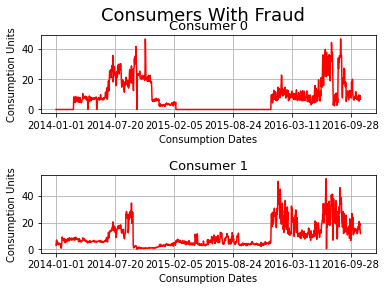

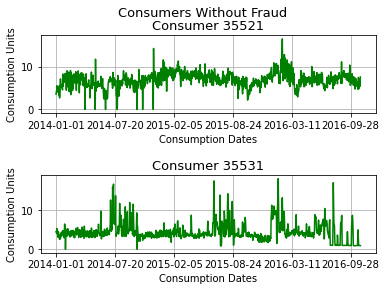

In [ ]:
#plot 1D graph for consumer
fig, axs = plt.subplots(2, 1)
fig.suptitle('Consumers With Fraud', fontsize=18)
plt.subplots_adjust(hspace=0.8,wspace=0.8)

data.loc[0].plot(ax=axs[0], color='red', grid=True)
axs[0].set_title('Consumer 0', fontsize=13)
axs[0].set_xlabel('Consumption Dates')
axs[0].set_ylabel('Consumption Units')

data.loc[2].plot(ax=axs[1], color='red', grid=True)
axs[1].set_title('Consumer 1', fontsize=13)
axs[1].set_xlabel('Consumption Dates')
axs[1].set_ylabel('Consumption Units')

fig, axs = plt.subplots(2, 1)
fig.suptitle('Consumers Without Fraud', fontsize=13)
plt.subplots_adjust(hspace=0.8)

data.loc[3].plot(ax=axs[0], color='green', grid=True)
axs[0].set_title('Consumer 35521', fontsize=13)
axs[0].set_xlabel('Consumption Dates')
axs[0].set_ylabel('Consumption Units')

data.loc[10].plot(ax=axs[1], color='green', grid=True)
axs[1].set_title('Consumer 35531', fontsize=13)
axs[1].set_xlabel('Consumption Dates')
axs[1].set_ylabel('Consumption Units')

Text(0, 0.5, 'Values')

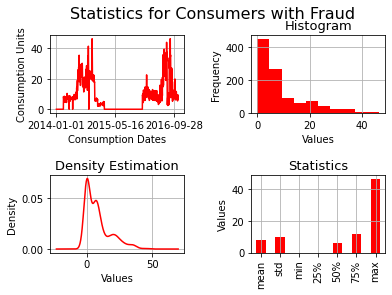

In [ ]:
fig2, axs2 = plt.subplots(2, 2)
fig2.suptitle('Statistics for Consumers with Fraud', fontsize=16)
plt.subplots_adjust(hspace=0.8,wspace=0.5)

#consumption chart
data.loc[0].plot(ax=axs2[0, 0], color='red', grid=True)
axs2[0, 0].set_xlabel('Consumption Dates')
axs2[0, 0].set_ylabel('Consumption Units')

#histogram
data.loc[0].hist(color='red', ax=axs2[0, 1], grid=True)
axs2[0, 1].set_title('Histogram', fontsize=13)
axs2[0, 1].set_xlabel('Values')
axs2[0, 1].set_ylabel('Frequency')

#density estimation
data.loc[0].plot.kde(color='red', ax=axs2[1, 0], grid=True)
axs2[1, 0].set_title('Density Estimation', fontsize=13)
axs2[1, 0].set_xlabel('Values')
axs2[1, 0].set_ylabel('Density')

#statistics
data.loc[0].describe().drop(['count']).plot(kind='bar', ax=axs2[1, 1], color='red', grid=True)
axs2[1, 1].set_title('Statistics', fontsize=13)
axs2[1, 1].set_ylabel('Values')

Text(0, 0.5, 'Values')

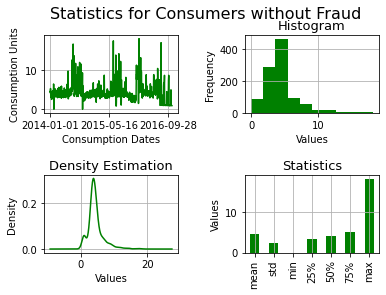

In [ ]:
fig3, axs3 = plt.subplots(2, 2)
fig3.suptitle('Statistics for Consumers without Fraud', fontsize=16)
plt.subplots_adjust(hspace=0.8,wspace=0.5)

#consumption chart
data.loc[10].plot(ax=axs3[0, 0], color='green', grid=True)
axs3[0, 0].set_xlabel('Consumption Dates')
axs3[0, 0].set_ylabel('Consumption Units')

#histogram
data.loc[10].hist(color='green', ax=axs3[0, 1])
axs3[0, 1].set_title('Histogram', fontsize=13)
axs3[0, 1].set_xlabel('Values')
axs3[0, 1].set_ylabel('Frequency')

#density estimation
data.loc[10].plot.kde(color='green', ax=axs3[1, 0], grid=True)
axs3[1, 0].set_title('Density Estimation', fontsize=13)
axs3[1, 0].set_xlabel('Values')
axs3[1, 0].set_ylabel('Density')

#statistics
data.loc[10].describe().drop(['count']).plot(kind='bar', ax=axs3[1, 1], color='green', grid=True)
axs3[1, 1].set_title('Statistics', fontsize=13)
axs3[1, 1].set_ylabel('Values')

# Data Processing for ML Models

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/CSE_Project/ml_data_final.csv')

In [ ]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,OutPut
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13.130,26.26,22.87,22.43,25.28,21.17,20.44,20.68,21.14,20.16,...,11.85,2.460,7.58,18.84,9.770,9.070,8.960,5.240,10.610,10.840,19.13,18.00,15.95,5.26,8.35,10.23,10.08,11.62,12.320,12.18,20.89,7.07,6.31,8.56,10.48,8.20,12.53,7.90,8.58,10.12,9.96,16.920,7.60,27.161,18.05,26.47,18.75,17.84,14.92,1
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.035,2.07,0.91,1.09,1.64,1.39,1.02,0.64,0.88,0.98,...,20.07,22.940,16.58,19.33,27.960,27.210,19.060,25.770,27.960,24.920,27.96,17.43,25.55,19.04,13.19,13.99,14.21,10.72,15.850,13.39,27.01,12.06,14.43,17.30,16.95,8.25,22.76,14.07,20.70,6.50,9.99,11.780,18.59,26.800,18.57,14.59,12.82,19.37,15.92,1
4,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,5.64,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,6.99,7.95,7.59,3.32,3.61,5.35,4.73,3.68,3.530,10.78,8.84,8.37,7.91,7.96,7.45,5.33,6.46,6.61,...,10.07,20.109,8.26,15.98,20.109,20.109,20.109,20.109,20.109,20.109,16.12,12.87,14.66,9.08,8.89,14.26,0.00,0.00,4.980,9.96,11.13,10.07,9.75,9.56,9.48,10.60,10.06,10.79,10.91,17.77,10.37,15.320,13.51,12.230,14.68,16.35,18.14,18.41,17.31,1
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.86,3.740,3.92,3.68,2.420,1.780,3.910,2.710,2.330,2.550,4.39,4.02,5.04,4.23,3.12,2.87,0.36,1.54,2.620,4.57,4.72,4.89,5.10,2.93,3.42,5.51,4.87,4.52,1.49,2.82,5.52,3.120,3.13,4.200,3.23,3.85,2.78,3.55,2.54,1
6,0.11,0.53,0.45,0.51,1.32,0.71,0.12,0.52,0.55,0.74,0.92,0.11,1.37,1.81,1.12,1.00,0.75,2.17,2.87,1.12,1.41,1.73,0.25,1.54,1.15,0.27,0.21,0.20,0.14,0.34,0.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.11,1.060,1.70,0.64,1.210,2.860,1.020,1.260,2.100,2.810,0.86,2.35,0.89,4.10,1.37,2.14,1.24,2.04,0.490,1.10,1.32,0.46,2.96,2.16,1.60,5.10,2.41,2.70,3.04,4.33,2.46,1.230,3.19,1.170,1.36,0.56,1.02,1.96,1.83,1
7,0.91,0.86,1.10,0.66,5.82,3.17,1.18,4.05,3.66,3.21,4.83,1.16,5.92,3.99,1.45,1.39,2.06,0.89,5.87,2.96,3.30,2.44,0.75,4.57,6.44,1.30,0.74,0.94,0.85,1.21,1.170,1.02,1.04,0.67,1.09,0.95,1.01,0.97,0.70,0.81,...,2.18,3.530,2.70,2.41,3.920,4.460,3.860,5.260,4.110,5.040,2.85,2.68,2.59,2.58,3.37,2.60,2.73,3.70,3.740,3.83,2.67,2.74,3.67,3.19,2.75,3.98,3.25,3.73,4.46,2.36,2.82,2.280,3.70,3.070,4.61,3.13,3.10,3.74,3.13,1
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.25,9.370,4.23,4.35,7.960,8.100,9.370,7.340,8.010,7.860,4.40,3.84,8.5

In [ ]:
data.shape

(33841, 1035)

In [ ]:
Y = data['OutPut']
data.drop(['OutPut'],axis=1,inplace=True)

In [ ]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
33836    0
33837    0
33838    0
33839    0
33840    0
Name: OutPut, Length: 33841, dtype: int64

In [ ]:
x = np.array(data)
y = np.array(Y)

In [ ]:
print(x.shape)
print(y.shape)

(33841, 1034)
(33841,)


# Splitting Data into Training *(80%)* | Validation *(10%)* | Test Set *(10%)*

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(x,y, train_size=0.8) #80% to be used for training and 20# remaining 

In [ ]:
#for validation and test set 
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5) #10% validation set and 10% testing set 

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(27072, 1034)
(27072,)
(3384, 1034)
(3384,)
(3385, 1034)
(3385,)


(None, None)

# Machine Learning Models : 

## Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
Logistic_Reg = LogisticRegression(random_state = 0,max_iter=10000)
Logistic_Reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

### Validation Data

In [ ]:
y_pred_lr_valid = Logistic_Reg.predict(X_valid)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred_lr_valid))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2968
           1       0.51      0.17      0.25       416

    accuracy                           0.88      3384
   macro avg       0.70      0.57      0.59      3384
weighted avg       0.85      0.88      0.85      3384



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_pred_lr_valid)

array([[2902,   66],
       [ 347,   69]])

### Testing Data

In [ ]:
y_pred_lr_test = Logistic_Reg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      3033
           1       0.58      0.19      0.29       352

    accuracy                           0.90      3385
   macro avg       0.74      0.59      0.62      3385
weighted avg       0.88      0.90      0.88      3385



In [ ]:
confusion_matrix(y_test, y_pred_lr_test)

array([[2983,   50],
       [ 284,   68]])

## KNN

### N = 3 | Validation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn_valid = classifier.predict(X_valid)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred_knn_valid))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2968
           1       0.52      0.13      0.21       416

    accuracy                           0.88      3384
   macro avg       0.70      0.56      0.57      3384
weighted avg       0.84      0.88      0.85      3384



In [ ]:
confusion_matrix(y_valid, y_pred_knn_valid)

array([[2917,   51],
       [ 361,   55]])

### N = 5 | Validation

In [ ]:
classifier_2 = KNeighborsClassifier(n_neighbors=5)
classifier_2.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn_valid_2 = classifier_2.predict(X_valid)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred_knn_valid_2))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2968
           1       0.58      0.11      0.18       416

    accuracy                           0.88      3384
   macro avg       0.73      0.55      0.56      3384
weighted avg       0.85      0.88      0.84      3384



In [ ]:
confusion_matrix(y_valid, y_pred_knn_valid_2)

array([[2935,   33],
       [ 371,   45]])

### N = 10 | Validation

In [ ]:
classifier_3 = KNeighborsClassifier(n_neighbors=10)
classifier_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred_knn_valid_3 = classifier_3.predict(X_valid)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred_knn_valid_3))

              precision    recall  f1-score   support

           0       0.88      0.99      0.94      2968
           1       0.62      0.06      0.11       416

    accuracy                           0.88      3384
   macro avg       0.75      0.53      0.52      3384
weighted avg       0.85      0.88      0.83      3384



In [ ]:
confusion_matrix(y_valid, y_pred_knn_valid_3)

array([[2952,   16],
       [ 390,   26]])

### N = 10 | Testing Data

In [ ]:
y_pred_knn_test = classifier_3.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3033
           1       0.67      0.07      0.13       352

    accuracy                           0.90      3385
   macro avg       0.78      0.53      0.54      3385
weighted avg       0.88      0.90      0.86      3385



In [ ]:
confusion_matrix(y_test, y_pred_knn_test)

array([[3020,   13],
       [ 326,   26]])

## SVM

In [ ]:
#importing support vector machine model from sklearn
from sklearn import svm
from sklearn.svm import SVC

### Kernel = 'linear'

In [ ]:
model_svm_linear = SVC(C= 1, kernel = 'linear')
model_svm_linear.fit(X_train, y_train)

In [ ]:
y_pred_svm_linear = model_svm_linear.predict(X_valid)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred_svm_linear))

In [ ]:
confusion_matrix(y_valid, y_pred_svm_linear)

### Kernel = 'rbf'

##### C = 1

In [ ]:
model_svm_rbf = svm.SVC(C = 1,kernel = 'rbf')
model_svm_rbf.fit(X_train, y_train)

SVC(C=1)

In [ ]:
y_pred_svm = model_svm_rbf.predict(X_valid)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred_svm))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2994
           1       0.80      0.04      0.08       390

    accuracy                           0.89      3384
   macro avg       0.84      0.52      0.51      3384
weighted avg       0.88      0.89      0.84      3384



In [ ]:
y_pred_svm = model_svm.predict(X_valid)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred_svm))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3004
           1       0.87      0.03      0.07       380

    accuracy                           0.89      3384
   macro avg       0.88      0.52      0.50      3384
weighted avg       0.89      0.89      0.84      3384



##### C = 10

In [ ]:
model_svm_rbf = svm.SVC(C = 10,kernel = 'rbf')
model_svm_rbf.fit(X_train, y_train)

SVC(C=10)

In [ ]:
y_pred_svm = model_svm_rbf.predict(X_valid)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred_svm))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3003
           1       0.58      0.05      0.09       381

    accuracy                           0.89      3384
   macro avg       0.74      0.52      0.51      3384
weighted avg       0.86      0.89      0.84      3384



### Kernel = 'poly'

##### Degree = 2

In [ ]:
model_svm_poly = svm.SVC(C = 1,kernel = 'poly',degree=2)
model_svm_poly.fit(X_train, y_train)

SVC(C=1, degree=2, kernel='poly')

In [ ]:
y_pred_svm_poly = model_svm_poly.predict(X_valid)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred_svm_poly))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3003
           1       0.73      0.02      0.04       381

    accuracy                           0.89      3384
   macro avg       0.81      0.51      0.49      3384
weighted avg       0.87      0.89      0.84      3384



##### Degree = 3

In [ ]:
model_svm_poly = svm.SVC(C = 1,kernel = 'poly',degree=3)
model_svm_poly.fit(X_train, y_train)

SVC(C=1, kernel='poly')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred_svm_poly))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3003
           1       0.73      0.02      0.04       381

    accuracy                           0.89      3384
   macro avg       0.81      0.51      0.49      3384
weighted avg       0.87      0.89      0.84      3384



##### Degree = 4

In [ ]:
model_svm_poly = svm.SVC(C = 1,kernel = 'poly',degree=4)
model_svm_poly.fit(X_train, y_train)

SVC(C=1, degree=4, kernel='poly')

In [ ]:
y_pred_svm_poly = model_svm_poly.predict(X_valid)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred_svm_poly))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3003
           1       0.62      0.03      0.05       381

    accuracy                           0.89      3384
   macro avg       0.76      0.51      0.50      3384
weighted avg       0.86      0.89      0.84      3384



## Decision Tree 

#### Criterion : Gini

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt=DecisionTreeClassifier() #by default gini 
classifier_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt_valid=classifier_dt.predict(X_valid)

In [ ]:
print(classification_report(y_valid, y_pred_dt_valid))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2994
           1       0.24      0.27      0.26       390

    accuracy                           0.82      3384
   macro avg       0.57      0.58      0.58      3384
weighted avg       0.83      0.82      0.82      3384



In [ ]:
confusion_matrix(y_valid, y_pred_dt_valid)

array([[2663,  331],
       [ 283,  107]])

#### Criterion : Entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt_ent=DecisionTreeClassifier(criterion='entropy')
classifier_dt_ent.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_dt_ent_valid=classifier_dt_ent.predict(X_valid)

In [ ]:
print(classification_report(y_valid, y_pred_dt_ent_valid))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2994
           1       0.27      0.27      0.27       390

    accuracy                           0.83      3384
   macro avg       0.59      0.59      0.59      3384
weighted avg       0.83      0.83      0.83      3384



In [ ]:
confusion_matrix(y_valid, y_pred_dt_ent_valid)

array([[2715,  279],
       [ 286,  104]])

#### Criterion : Entropy, Splitter : Random

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt_ent_rn=DecisionTreeClassifier(criterion='entropy', splitter='random')
classifier_dt_ent_rn.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [ ]:
y_pred_dt_ent_rn_valid=classifier_dt_ent_rn.predict(X_valid)

In [ ]:
print(classification_report(y_valid, y_pred_dt_ent_rn_valid))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2994
           1       0.27      0.27      0.27       390

    accuracy                           0.83      3384
   macro avg       0.59      0.59      0.59      3384
weighted avg       0.83      0.83      0.83      3384



In [ ]:
confusion_matrix(y_valid, y_pred_dt_ent_rn_valid)

array([[2712,  282],
       [ 286,  104]])

#### Test Set 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt_ent=DecisionTreeClassifier(criterion='entropy')
classifier_dt_ent.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_dt_ent_test=classifier_dt_ent.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_dt_ent_test))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3041
           1       0.26      0.31      0.28       344

    accuracy                           0.84      3385
   macro avg       0.59      0.60      0.60      3385
weighted avg       0.85      0.84      0.85      3385



In [ ]:
confusion_matrix(y_test, y_pred_dt_ent_test)

array([[2741,  300],
       [ 238,  106]])

## Artificial Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
846/846 [==============================] - 5s 4ms/step - loss: 0.6437 - accuracy: 0.8903
Epoch 2/100
846/846 [==============================] - 3s 4ms/step - loss: 0.3431 - accuracy: 0.8935
Epoch 3/100
846/846 [==============================] - 3s 4ms/step - loss: 0.3139 - accuracy: 0.8937
Epoch 4/100
846/846 [==============================] - 3s 4ms/step - loss: 0.3112 - accuracy: 0.8937
Epoch 5/100
846/846 [==============================] - 3s 4ms/step - loss: 0.3145 - accuracy: 0.8937
Epoch 6/100
846/846 [==============================] - 3s 4ms/step - loss: 0.3178 - accuracy: 0.8937
Epoch 7/100
846/846 [==============================] - 3s 3ms/step - loss: 0.3054 - accuracy: 0.8937
Epoch 8/100
846/846 [==============================] - 3s 4ms/step - loss: 0.3045 - accuracy: 0.8938
Epoch 9/100
846/846 [==============================] - 3s 4ms/step - loss: 0.3192 - accuracy: 0.8938
Epoch 10/100
846/846 [==============================] - 3s 3ms/step - loss: 0.2995 - accura

#### Test Set

In [ ]:
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)

In [ ]:
from sklearn.metrics import accuracy_score
cm_ann = confusion_matrix(y_test, y_pred_ann)
print(cm_ann)
print('The accuracy of ANN Model is: ', round((accuracy_score(y_test, y_pred_ann)*100),3),"%")

[[3005   36]
 [ 298   46]]
The accuracy of ANN Model is:  90.133 %


### ANN - 2

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
846/846 [==============================] - 5s 3ms/step - loss: 0.5367 - accuracy: 0.8884
Epoch 2/200
846/846 [==============================] - 3s 3ms/step - loss: 0.3408 - accuracy: 0.8925
Epoch 3/200
846/846 [==============================] - 2s 3ms/step - loss: 0.3357 - accuracy: 0.8926
Epoch 4/200
846/846 [==============================] - 2s 3ms/step - loss: 0.3346 - accuracy: 0.8927
Epoch 5/200
846/846 [==============================] - 3s 3ms/step - loss: 0.3336 - accuracy: 0.8930
Epoch 6/200
846/846 [==============================] - 3s 3ms/step - loss: 0.3644 - accuracy: 0.8913
Epoch 7/200
846/846 [==============================] - 3s 3ms/step - loss: 0.3443 - accuracy: 0.8921
Epoch 8/200
846/846 [==============================] - 2s 3ms/step - loss: 0.3345 - accuracy: 0.8928
Epoch 9/200
846/846 [==============================] - 2s 3ms/step - loss: 0.3345 - accuracy: 0.8930
Epoch 10/200
846/846 [==============================] - 3s 3ms/step - loss: 0.3350 - accura

# Results